In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [135]:
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group.*")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [78]:
Datafilepath='https://raw.githubusercontent.com/BigDataEngineer09/EDA-Nielsen-storedata-customer-transaction-analysis/main/Hackathon_Working_Data.csv'
data = pd.read_csv(Datafilepath)

In [79]:
data.shape

(26985, 14)

In [80]:
data.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [82]:
data.tail()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN
26984,M3,N10,31,T6013,15.0,1.0,15.0,15.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,SAJ INDS,BISK FARM,BISK FARM JUST GINGER


In [83]:
#To understand what is PRICE and Value
specific_value = 'T375'
filtered_data = data[data['BILL_ID'] == specific_value]
filtered_data=filtered_data[filtered_data['BILL_AMT']==420]
filtered_data

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
2806,M1,N2,5,T375,420.0,1.0,70.0,70.0,COFFEE,INSTANT COFFEE,INSTANT COFFEE,NESTLE INDIA,NESCAFE,NESCAFE CLASSIC
2807,M1,N2,5,T375,420.0,1.0,100.0,100.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GIRNAR FOOD & BEVER,GIRNAR,GIRNAR
2808,M1,N2,5,T375,420.0,1.0,200.0,200.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,TATA GLOBAL BEVERAGES LTD,TATA TETLEY,TATA TETLEY
2809,M1,N2,5,T375,420.0,2.0,50.0,25.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,BRITANNIA INDS,NUTRICHOICE,NUTRICHOICE OATS COOKIES


# 1. Understanding the data

* MONTH     : Month when the transaction occurred   
* STORECODE : A unique identifier for each store
* DAY       : Day when the transaction occurred  
* BILL_ID   : A unique identifier for each transaction or bill
* BILL_AMT  : Represents total amount of the purchase
* QTY       : Represents number of units of a product  
* VALUE     : The total value of the item(s) purchased, calculated as quantity multiplied by price
* PRICE     : Price of a single unit  
* GRP       : Group or Category of the products  
* SGRP      : Subgroup or subcategory of product groups   
* SSGRP     : Subgroup of Subgroup of product groups
* CMP       : Represents Company name
* MBRD      : Represents Mother Brand
* BRD       : Represents Brand name

**Observation**
There are many same BILL_ID's that are generated for many stores
For example: BILL_ID : T375 is used in store 1,3,4,5 and 6.
Hence, create a column which contains unique Bill_Id (helpful for sales per store analysis)

In [84]:
len(data['GRP'].unique())

80

In [85]:
data['UNIQUE_BILL_ID'] = data['STORECODE'] + data['BILL_ID']

In [86]:
data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1T384


In [87]:
sales_revenue=data.groupby('UNIQUE_BILL_ID')['BILL_AMT'].sum().reset_index()
sales_revenue.head()

,UNIQUE_BILL_ID,BILL_AMT
0,N10T1038,34.0
1,N10T1039,46.0
2,N10T1040,86.0
3,N10T1043,20.0
4,N10T1048,360.0


In [88]:
specific_value = 'N10T1048'
filtered_data = data[data['UNIQUE_BILL_ID'] == specific_value]
filtered_data

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
10672,M1,N10,5,T1048,180.0,1.0,147.0,147.0,SPICES (03/04),PURE,ASOFOETIDA/HING-PURE MASALA,LALJI GODU,L G,L G,N10T1048
10673,M1,N10,5,T1048,180.0,1.0,33.0,33.0,SPICES (03/04),BLENDED,CHAT MASALA-SNACK MASALA,K C J & CO,EVEREST,EVEREST,N10T1048


**Observation**: Use of Bill_AMT to compute sales revenue will produce false results because group by UNIQUE_BILL_ID or STORECODE will add the BILL_AMT if more than one item is purchased. Therefore, VALUE is the correct column to get actual revenue by the stores.

 # 2. Preparing Data for EDA

**Data preprocessing**
1. Missing Values
2. Duplicate Records
3. Data Encoding
4. Numerical Variables
5. Categorical Variables
6. Distribuiton of Numerical values
7. Univariate Analysis (Numerical & Categorical)
8. Correlation Analysis (Numerical & Categorical)


**1. Missing Values**

In [89]:
#check null values
dataset= data.copy()
dataset.isnull().sum()

MONTH             0
STORECODE         0
DAY               0
BILL_ID           0
BILL_AMT          0
QTY               0
VALUE             0
PRICE             0
GRP               0
SGRP              0
SSGRP             0
CMP               0
MBRD              0
BRD               0
UNIQUE_BILL_ID    0
dtype: int64

In [90]:
#To check if there are any missing values
is_any_missing_data=dataset.isna().any().any()
is_any_missing_data

False

There are no missing values

**2. Duplicate Records**

In [91]:
dataset.duplicated().sum()
#Fetch all duplicate values
#dr=dataset[dataset.duplicated(keep='last')]

90

In [92]:
#Remove Duplicate Records
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [93]:
dataset.dtypes

MONTH              object
STORECODE          object
DAY                 int64
BILL_ID            object
BILL_AMT          float64
QTY               float64
VALUE             float64
PRICE             float64
GRP                object
SGRP               object
SSGRP              object
CMP                object
MBRD               object
BRD                object
UNIQUE_BILL_ID     object
dtype: object

**3. Encoding data into numerical values**

There are 2 categorial columns (STORECODE,MONTH). Enocding these columns is a crucial step in preparing data for machine learning models, as most models require numerical input

*1. Enocde MONTH to numberical data*

In [94]:
def remove_character(column):
    return column.str.replace('M', '')

dataset['MONTH'] = remove_character(dataset['MONTH'])
dataset['MONTH'] = dataset['MONTH'].astype(int)

*2. Another approach: Encode STORECODE using LabelEncoder*

In [95]:
label_encoder = LabelEncoder()
dataset['STORECODE'] = label_encoder.fit_transform(dataset['STORECODE']) + 1

**4. Numerical features**

In [96]:
numerical_variables = [feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print('Number of numberical variables:', len(numerical_variables))

dataset[numerical_variables].sample(1)

Number of numberical variables: 7


,MONTH,STORECODE,DAY,BILL_AMT,QTY,VALUE,PRICE
11744,2,6,17,48.0,2.0,20.0,10.0


In [97]:
days=dataset['DAY'].unique()
print('days ',sorted(days))

days  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [98]:
unique_storecodes = dataset['STORECODE'].unique()
sorted_unique_storecodes = sorted(unique_storecodes)
print('storecodes ',sorted_unique_storecodes)

storecodes  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**5. Categorical Variables**

In [99]:
categorial_variables = [feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print('Number of categorial variables:', len(categorial_variables))

dataset[categorial_variables].sample(1)

Number of categorial variables: 8


,BILL_ID,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
9578,T824,SOAP CAKES/BARS,SOAP CAKES/BARS,SOAP CAKES/BARS,HINDUSTAN UNILEVER LIMITED,WHEEL,WHEEL OK ACTIVE,N4T824


**6. Distribuition of numerical features**

**Distribution of continuous numerical features in your dataset**

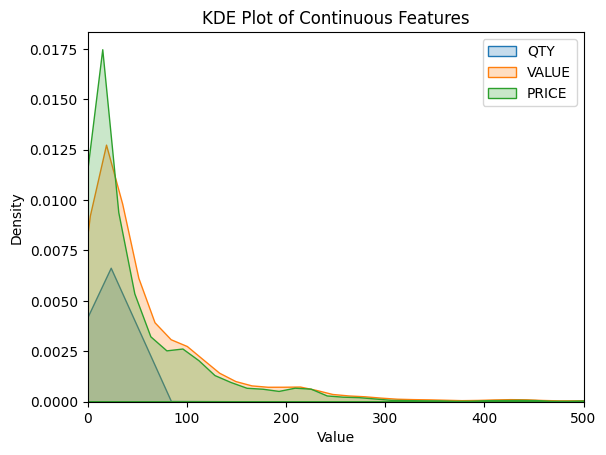

In [136]:
continuous_features = ['QTY', 'VALUE', 'PRICE']
for feature in continuous_features:
    sns.kdeplot(data[feature], shade=True, label=feature)
plt.title('KDE Plot of Continuous Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 500)
plt.legend()
plt.show()

***a. Overall Sales by Month***

The month M2 has produced highest revenue

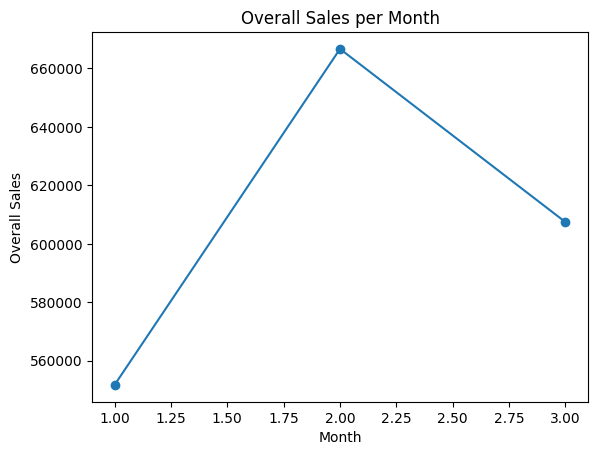

In [101]:
Overall_sales_per_month= dataset.groupby('MONTH')['VALUE'].sum()
Overall_sales_per_month.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Overall Sales')
plt.title('Overall Sales per Month')
plt.show()

***b. Overall sales by store***

Store N8 has the highest revenue in all 3 months, whereas store N7 has the lowest revenue off all 10 stores. When it comes to avareage sales in each store, N3 has the highest average sales

In [102]:
sales_per_store = dataset.groupby('STORECODE')['VALUE'].sum().reset_index()
sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
sales_per_store

,STORECODE,VALUE
7,8,273296.65
9,10,250777.03
5,6,237242.00
2,3,221275.00
4,5,206595.99
0,1,143653.93
1,2,141199.00
3,4,125373.79
8,9,116421.86
6,7,110010.00


In [103]:
Average_sales_per_store = dataset.groupby('STORECODE')['VALUE'].mean().reset_index()
Average_sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
Average_sales_per_store

,STORECODE,VALUE
2,3,166.748304
9,10,164.336193
8,9,103.302449
6,7,93.149873
3,4,70.237417
1,2,65.551996
4,5,64.360121
5,6,53.674661
7,8,48.785550
0,1,31.482343


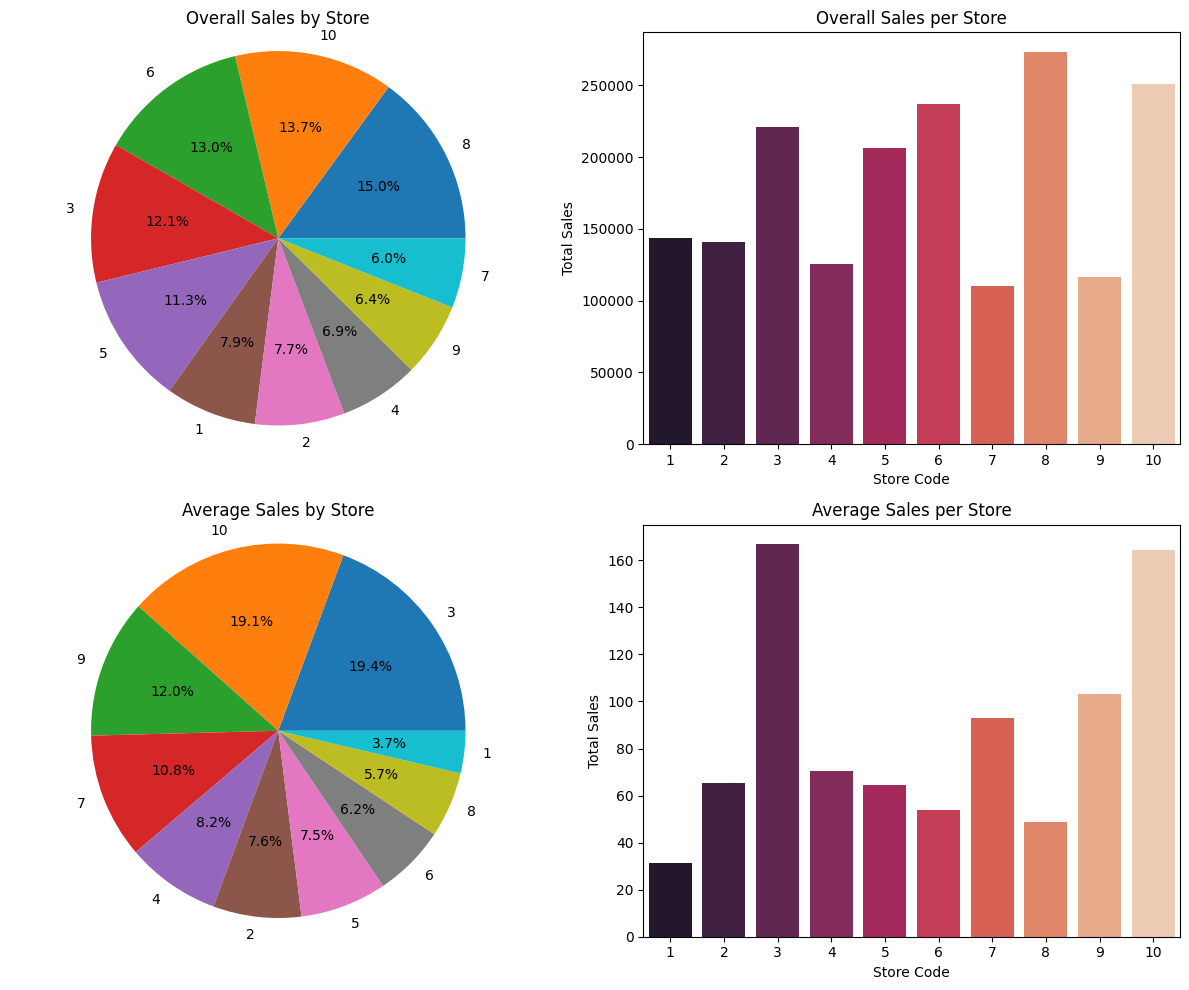

In [137]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Pie chart
axes[0, 0].pie(sales_per_store['VALUE'], labels=sales_per_store['STORECODE'], autopct='%1.1f%%')
axes[0, 0].set_title('Overall Sales by Store')
axes[0, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=sales_per_store, palette="rocket", ax=axes[0, 1])
axes[0, 1].set_title('Overall Sales per Store')
axes[0, 1].set_xlabel('Store Code')
axes[0, 1].set_ylabel('Total Sales')
# Pie chart
axes[1, 0].pie(Average_sales_per_store['VALUE'], labels=Average_sales_per_store['STORECODE'], autopct='%1.1f%%')
axes[1, 0].set_title('Average Sales by Store')
axes[1, 0].axis('equal')
# Bar plot
sns.barplot(x='STORECODE', y='VALUE', data=Average_sales_per_store, palette="rocket", ax=axes[1, 1])
axes[1, 1].set_title('Average Sales per Store')
axes[1, 1].set_xlabel('Store Code')
axes[1, 1].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()

***c. Daily sales by store***

In [105]:
sales_by_month_day = dataset.groupby(['MONTH', 'DAY'])['VALUE'].sum().reset_index()

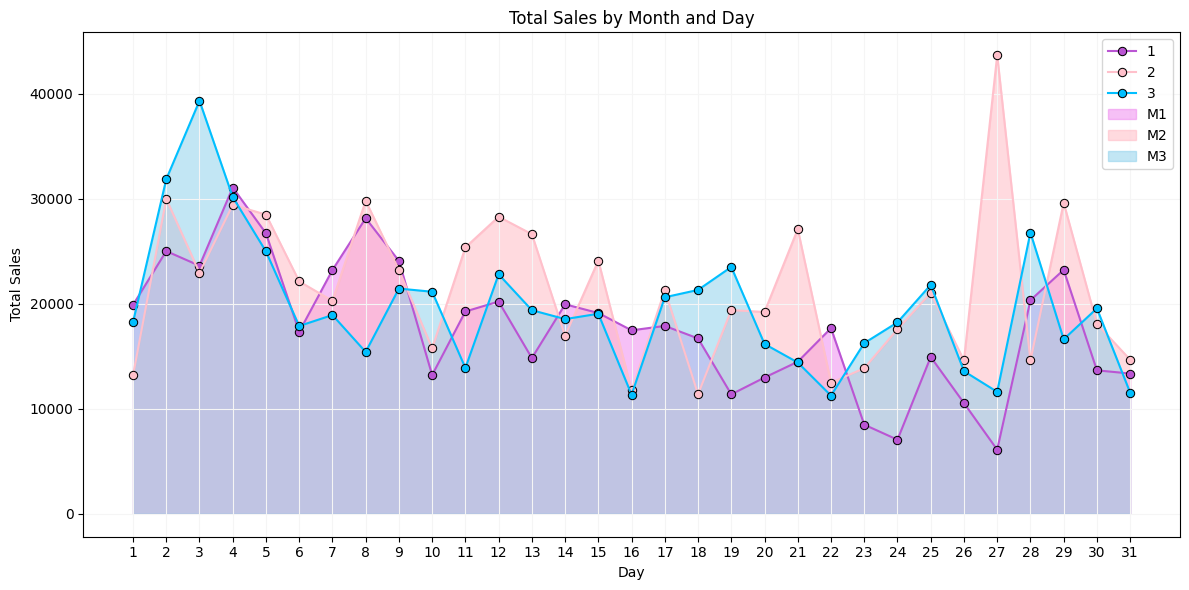

In [106]:
fig, ax = plt.subplots(figsize=(12, 6))
palettes=['mediumorchid','pink','deepskyblue']
sns.lineplot(data=sales_by_month_day, x='DAY', y='VALUE', hue='MONTH', marker='o',markeredgecolor='black',palette=palettes, ax=ax)
ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.set_title('Sales by Day, Month-wise')
ax.legend(title='Month')
ax.set_xticks(range(1, max(dataset['DAY']) + 1))

sales_by_month_day_m1 = sales_by_month_day[sales_by_month_day['MONTH'] == 1]
sales_by_month_day_m2 = sales_by_month_day[sales_by_month_day['MONTH'] == 2]
sales_by_month_day_m3 = sales_by_month_day[sales_by_month_day['MONTH'] == 3]

ax.fill_between(sales_by_month_day_m1['DAY'], sales_by_month_day_m1['VALUE'], alpha=0.5, label='M1',color="violet")
ax.fill_between(sales_by_month_day_m2['DAY'], sales_by_month_day_m2['VALUE'], alpha=0.5, label='M2',color="lightpink")
ax.fill_between(sales_by_month_day_m3['DAY'], sales_by_month_day_m3['VALUE'], alpha=0.5, label='M3',color="skyblue")
ax.set_xlabel('Day')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Month and Day')
ax.legend()
ax.grid(True,color='whitesmoke')
plt.tight_layout()
plt.show()

***d. Total number of products sold over 3 months***

In [107]:
total_products_per_store= dataset.groupby('STORECODE')['QTY'].sum().sort_values(ascending=False).reset_index()
total_products_per_store

,STORECODE,QTY
0,1,40499.0
1,3,23782.0
2,8,17867.0
3,5,7906.0
4,6,7131.0
5,2,3568.0
6,4,2869.0
7,10,2611.0
8,9,2507.0
9,7,1929.0


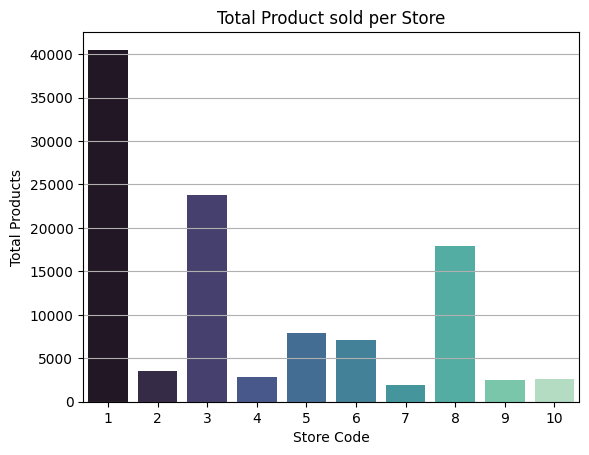

In [138]:
sns.barplot( x='STORECODE', y='QTY',data=total_products_per_store, palette = "mako")
plt.title('Total Product sold per Store')
plt.xlabel('Store Code')
plt.ylabel('Total Products')
plt.grid(axis='y')
plt.show()

***e. Sales Vs Number of Products Sold on each store***

In [109]:
merged_data = pd.merge(total_products_per_store, sales_per_store, on='STORECODE')
merged_data.set_index('STORECODE', inplace=True)
merged_data.reset_index(inplace=True)
merged_data

,STORECODE,QTY,VALUE
0,1,40499.0,143653.93
1,3,23782.0,221275.00
2,8,17867.0,273296.65
3,5,7906.0,206595.99
4,6,7131.0,237242.00
5,2,3568.0,141199.00
6,4,2869.0,125373.79
7,10,2611.0,250777.03
8,9,2507.0,116421.86
9,7,1929.0,110010.00


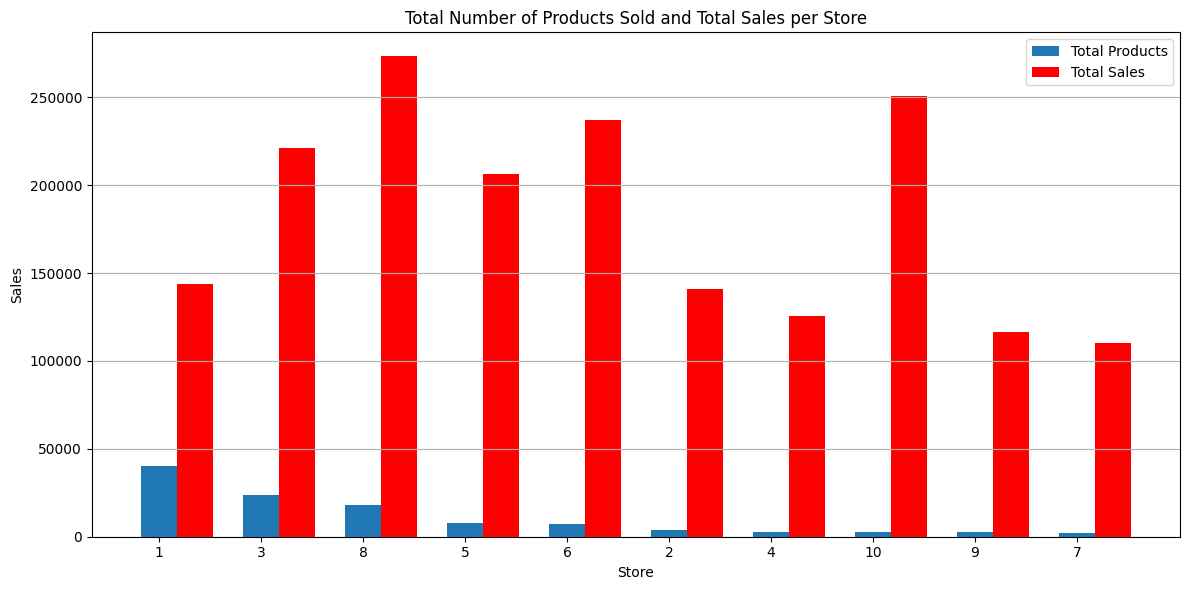

In [110]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(merged_data))
bar1 = plt.bar(x, merged_data['QTY'], bar_width, label='Total Products')
bar2 = plt.bar(merged_data.index + bar_width, merged_data['VALUE'], bar_width, label='Total Sales', color='red')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Total Number of Products Sold and Total Sales per Store')
plt.xticks(x,merged_data['STORECODE'])
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

***f. Total orders per day***

In [111]:
orders_per_store_per_day_per_month = dataset.groupby(['STORECODE', 'MONTH', 'DAY'])['UNIQUE_BILL_ID'].nunique().reset_index(name='Total_Number_of_Orders')
print(orders_per_store_per_day_per_month)

     STORECODE  MONTH  DAY  Total_Number_of_Orders
0            1      1    4                      72
1            1      1    5                      79
2            1      1    6                      55
3            1      1    7                      72
4            1      1    8                      77
..         ...    ...  ...                     ...
658         10      3   14                       1
659         10      3   17                       1
660         10      3   18                       1
661         10      3   19                       3
662         10      3   20                       1

[663 rows x 4 columns]


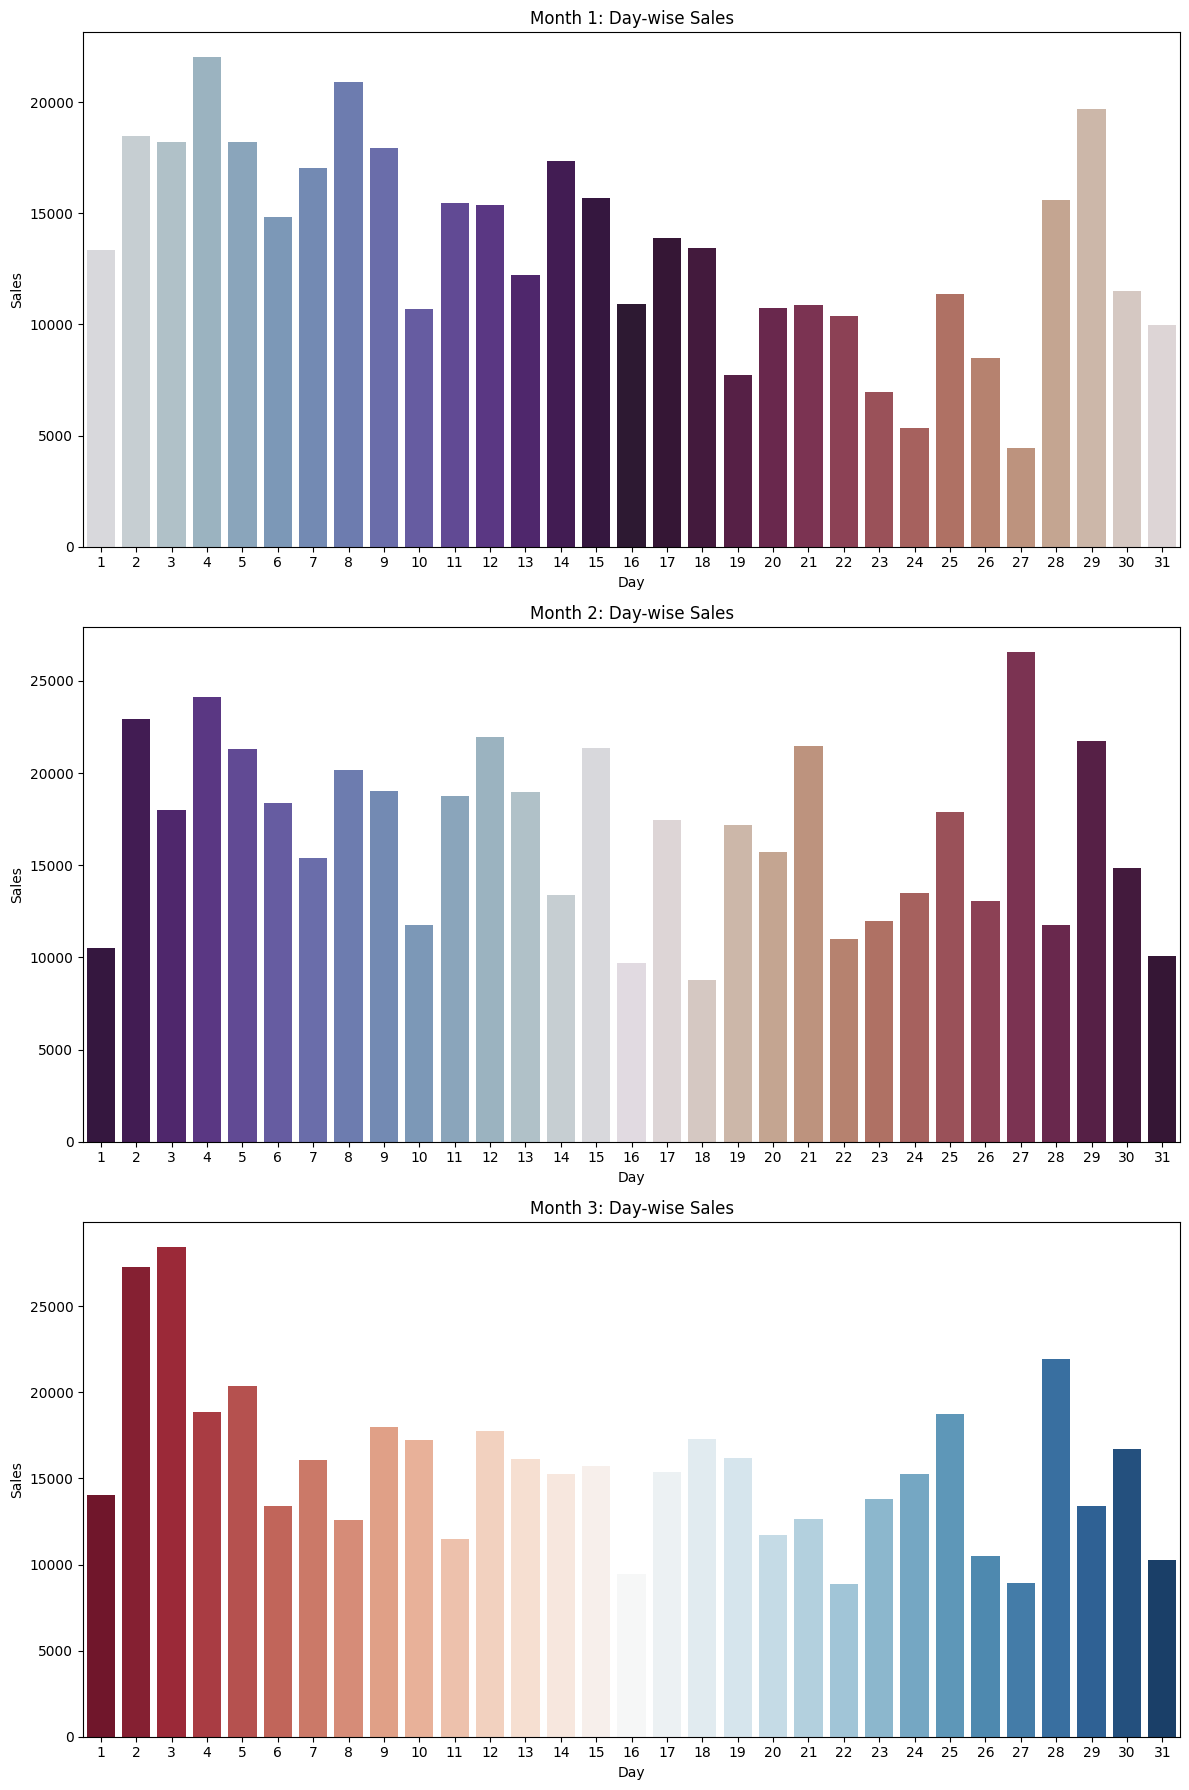

In [139]:
months = dataset['MONTH'].unique()

plt.figure(figsize=(12, 6 * len(months)))
palettes=['Greens','twilight','twilight_shifted','RdBu']
for i, month in enumerate(months, 1):
    month_data = dataset[dataset['MONTH'] == month]
    day_sales_month = month_data.groupby('DAY')['PRICE'].sum().reset_index()

    plt.subplot(len(months), 1, i)
    sns.barplot(x='DAY', y='PRICE', data=day_sales_month,palette=palettes[i])
    plt.xlabel('Day')
    plt.ylabel('Sales')
    plt.title(f"Month {month}: Day-wise Sales")

plt.tight_layout()
plt.show()

**g. The most bought product**

In [113]:
most_bought_product = dataset['GRP'].value_counts().idxmax()
frequency = dataset['GRP'].value_counts().max()

print(f"The most bought product is '{most_bought_product}' with a frequency of {frequency}.")

The most bought product is 'BISCUITS - CORE & NON CORE' with a frequency of 6646.


In [114]:
unique_grp_count = dataset['GRP'].nunique()
print("Unique GRP count:", unique_grp_count)

Unique GRP count: 80


 **h. Top 10 Products that Customers most preferred in each store**

In [115]:
store_data = dataset[dataset['STORECODE'] == 1]
store_data

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
0,1,1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1T375
1,1,1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1T379
2,1,1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1T381
3,1,1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1T382
4,1,1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1T384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17468,3,1,30,T9251,208.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,I T C,SUNFEAST MOM'S MAGIC,SUNFEAST MOM'S MGC CSHW & ALND,N1T9251
17469,3,1,30,T9251,208.0,1.0,5.0,5.0,VERMICELLI & NOODLE,INSTANT NOODLES,INSTANT NOODLES,INDO NISSIN,TOP RAMEN,TOP RAMEN,N1T9251
17470,3,1,30,T9251,208.0,1.0,10.0,10.0,TOILET SOAPS (04/00),POPULAR,POPULAR,RECKITT BENCKISER,DETTOL,DETTOL ORIGINAL,N1T9251
17471,3,1,30,T9255,154.0,1.0,10.0,10.0,CONFECTIONERY - TOFFEE/HBC,TOFFEES,TOFFEES,I T C,JELIMALS,JELIMALS FRUITY BEARS,N1T9255


In [116]:
most_bought_product_in_each_store = store_data.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
most_bought_product_in_each_store

,STORECODE,GRP,QTY
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0
1,1,BISCUITS - CORE & NON CORE,1765.0
2,1,VANASPATI CONS PACK (8/94),1019.0
3,1,"FRAGRANCE-PERFUM,DEO & COLOGNE",1005.0
4,1,CHOCOLATE,824.0
...,...,...,...
63,1,HAIR REMOVER,1.0
64,1,OTHER SCOURERS,1.0
65,1,BABY FOODS,1.0
66,1,ANTISEPTIC LIQUIDS (4/97),1.0


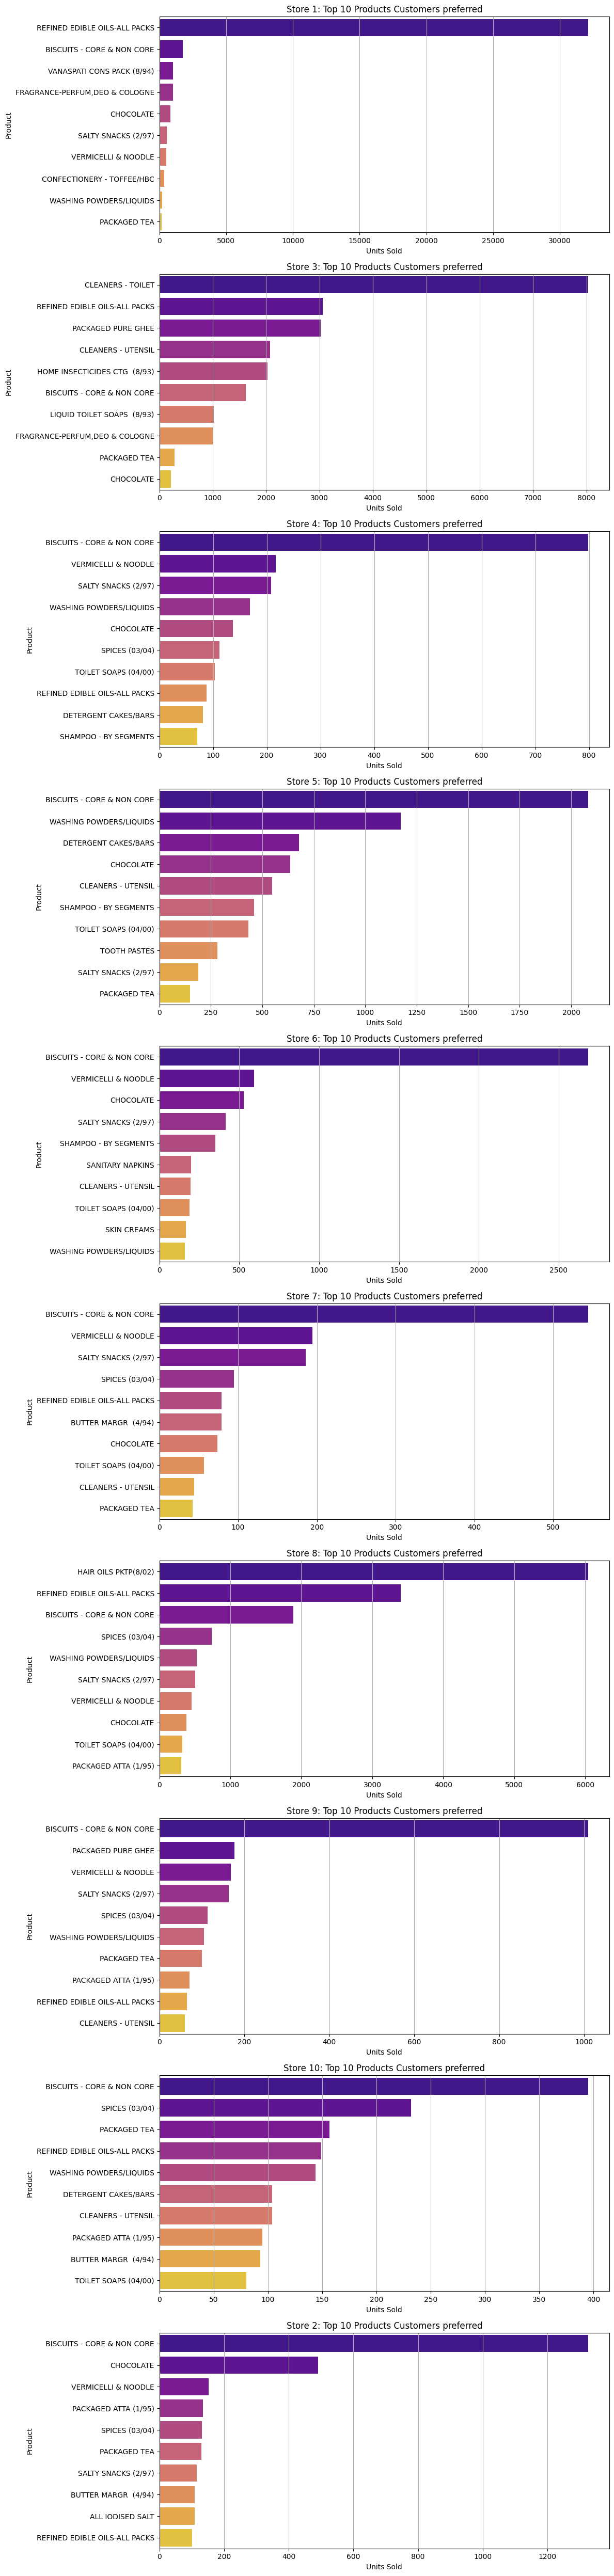

In [140]:
stores = dataset['STORECODE'].unique()

plt.figure(figsize=(12, 5 * len(stores)))
palettes = ['hls', 'RdPu', 'Blues', 'Greens']

for i, store in enumerate(stores, 1):
    store_data = dataset[dataset['STORECODE'] == store]
    most_bought_product_in_each_store = store_data.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
    plt.subplot(len(stores), 1, i)
    sns.barplot(x='QTY', y='GRP', data=most_bought_product_in_each_store[:10], palette='plasma')
    plt.grid(axis='x')
    plt.xlabel('Units Sold')
    plt.ylabel('Product')
    plt.title(f"Store {store}: Top 10 Products Customers preferred")
plt.tight_layout()
plt.show()


**i.Top 3 products sold in each store**

In [118]:
most_bought_product_in_each_store = dataset.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
most_bought_product_in_each_store.head()

,STORECODE,GRP,QTY
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0
1,3,CLEANERS - TOILET,8027.0
2,8,HAIR OILS PKTP(8/02),6037.0
3,8,REFINED EDIBLE OILS-ALL PACKS,3403.0
4,3,REFINED EDIBLE OILS-ALL PACKS,3057.0


In [119]:
top_3_products = most_bought_product_in_each_store.groupby("STORECODE").head(3)
top_3_products=top_3_products.sort_values(by='STORECODE', ascending=True)
top_3_products

,STORECODE,GRP,QTY
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0
16,1,VANASPATI CONS PACK (8/94),1019.0
11,1,BISCUITS - CORE & NON CORE,1765.0
33,2,CHOCOLATE,491.0
13,2,BISCUITS - CORE & NON CORE,1325.0
75,2,VERMICELLI & NOODLE,153.0
4,3,REFINED EDIBLE OILS-ALL PACKS,3057.0
1,3,CLEANERS - TOILET,8027.0
5,3,PACKAGED PURE GHEE,3021.0
21,4,BISCUITS - CORE & NON CORE,798.0


In [120]:
prd_number=[]
prd_to_assign=['P1','P2','P3']
for i in range(0,int(len(top_3_products.index)/3)):
    prd_number.extend(prd_to_assign)
top_3 =top_3_products.copy()
top_3['PRD'] = prd_number
top_3.head()

,STORECODE,GRP,QTY,PRD
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0,P1
16,1,VANASPATI CONS PACK (8/94),1019.0,P2
11,1,BISCUITS - CORE & NON CORE,1765.0,P3
33,2,CHOCOLATE,491.0,P1
13,2,BISCUITS - CORE & NON CORE,1325.0,P2


In [125]:
top_3_products_in_each_store=[]
top_3_products_in_each_store = top_3['GRP'].tolist()
len(top_3_products_in_each_store)

30

IndexError: list index out of range

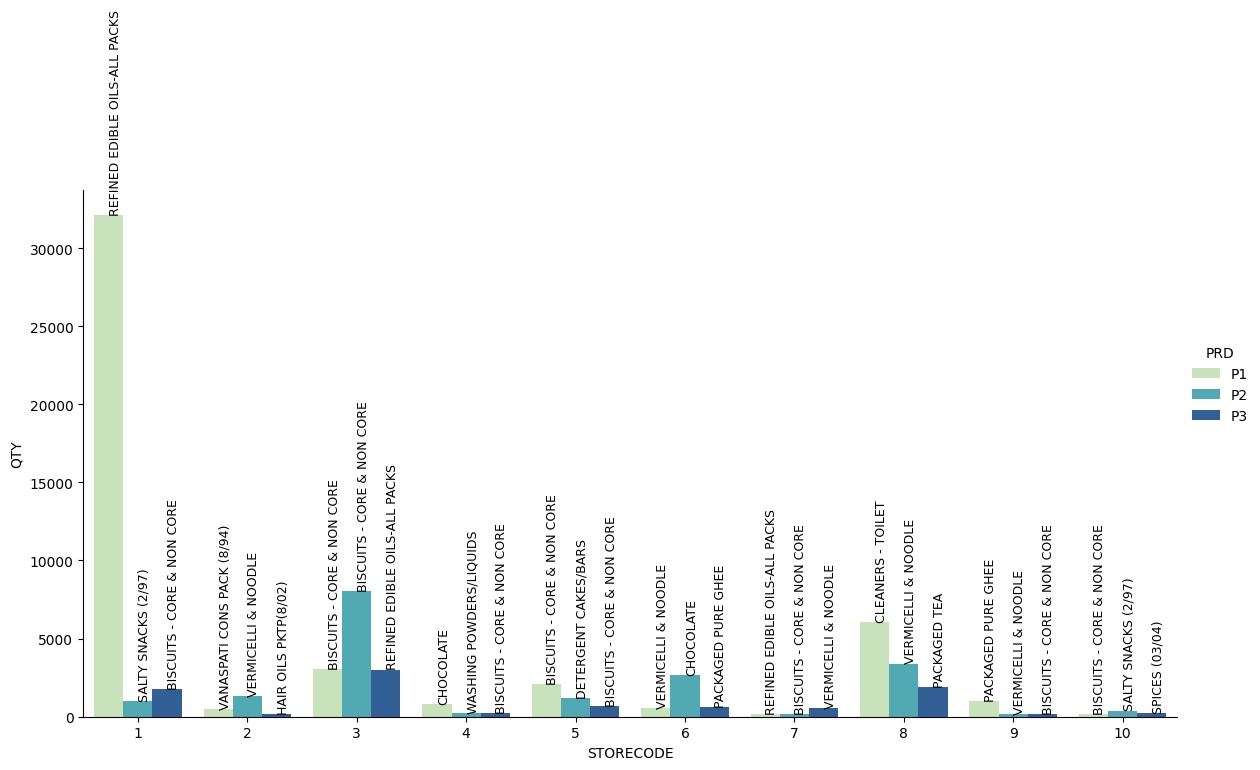

In [127]:
catplot = sns.catplot(x='STORECODE', y='QTY', hue='PRD', data=top_3, kind='bar', height=6, aspect=2,palette='YlGnBu')
ax1 = catplot.ax
annotations = top_3_products_in_each_store
for i, bar in enumerate(ax1.patches):
    x_coord = bar.get_x() + bar.get_width() / 2
    y_coord = bar.get_height() + 5
    annotation_text = annotations[i]
    ax1.text(x_coord,y_coord, annotation_text,rotation=90,fontsize=9, ha='left', va='bottom')
ax1.set_xlabel('Storecode', fontsize=12)
ax1.set_ylabel('product Units sold', fontsize=12)
legend = catplot._legend
legend.set_title('PRD')
legend.get_title().set_fontsize(12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.gcf().set_size_inches(10, 10)
plt.show()

In [128]:
top_grp_N1 = top_3_products[top_3_products['STORECODE'] == 1]['GRP'].iloc[0]
print(f"Top GRP for store N1: {top_grp_N1}")

Top GRP for store N1: REFINED EDIBLE OILS-ALL PACKS


# Univariate Analysis

MONTH
Skew : -0.07


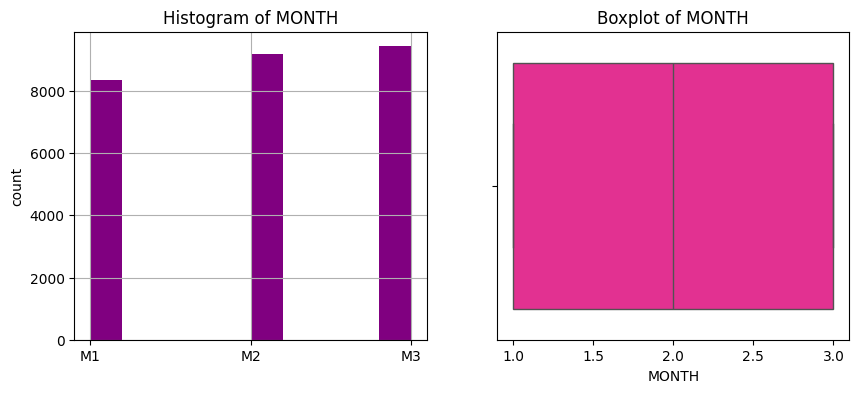

STORECODE
Skew : -0.15


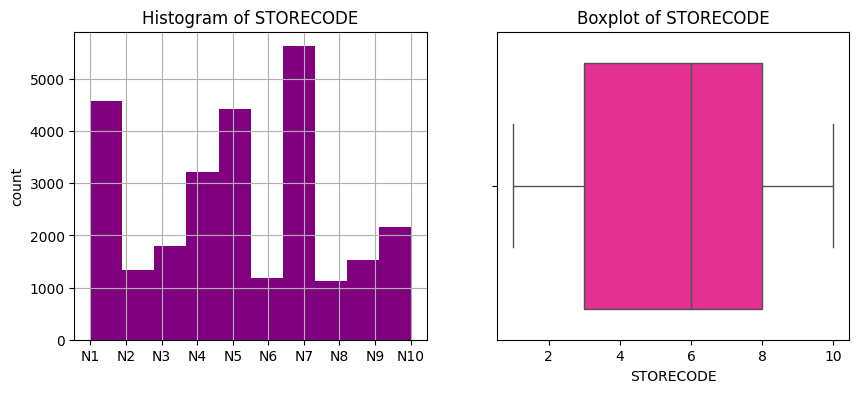

DAY
Skew : 0.16


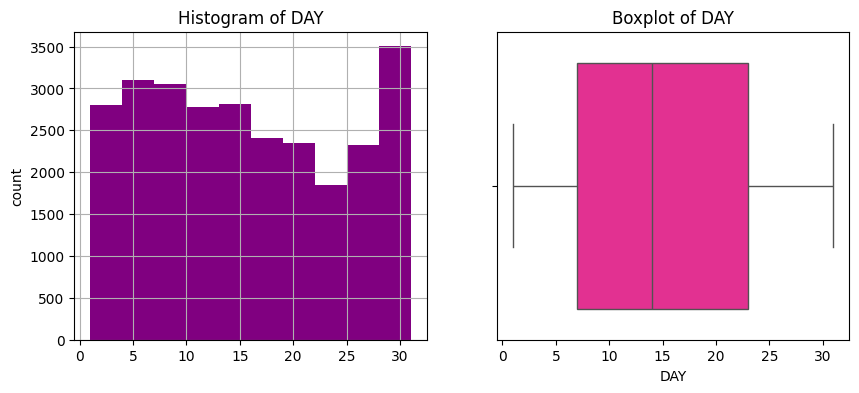

BILL_AMT
Skew : 5.94


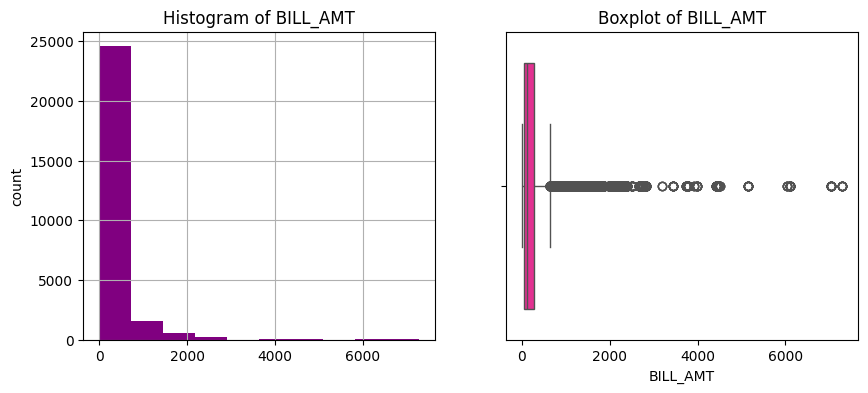

QTY
Skew : 84.94


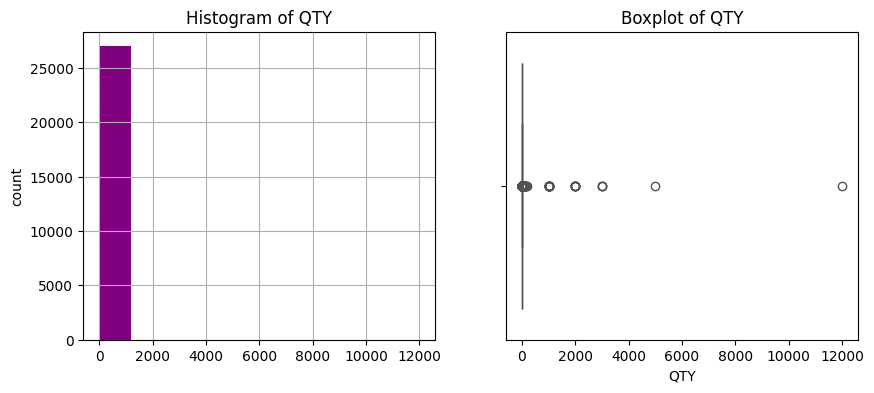

VALUE
Skew : 8.22


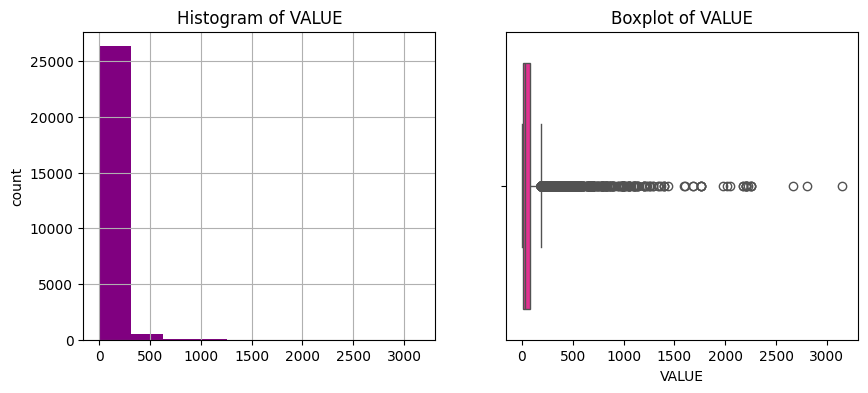

PRICE
Skew : 7.17


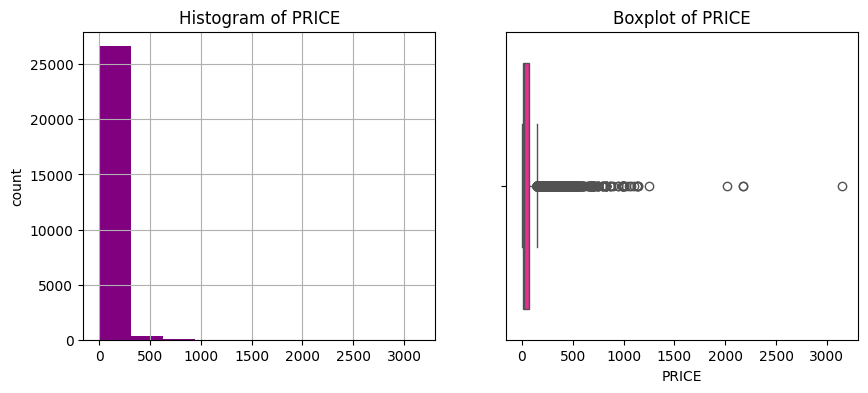

In [141]:
for col in numerical_variables:
    print(col)
    print('Skew :', round(dataset[col].skew(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=True,color='purple')
    plt.ylabel('count')
    plt.title('Histogram of ' + col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset[col],color='deeppink')
    plt.title('Boxplot of ' + col)
    plt.show()

In [142]:
dataset[categorial_variables].sample(1)

,BILL_ID,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
20419,T2271,SPICES (03/04),BLENDED,PICKLE POWDER-OTHER MASALA,KPRA FOODS PVT LTD,KPRA,KPRA,N10T2271


**Univariate Analysis on Categorical variables**
1. Most sold product GRP is Biscuts
2. Cream is most bought sub category of products
3. The most prefered products by the customers are from Hindustan Uniliver Limited
4. The most products are sold by TATA,DAIRY MILK and AMUL

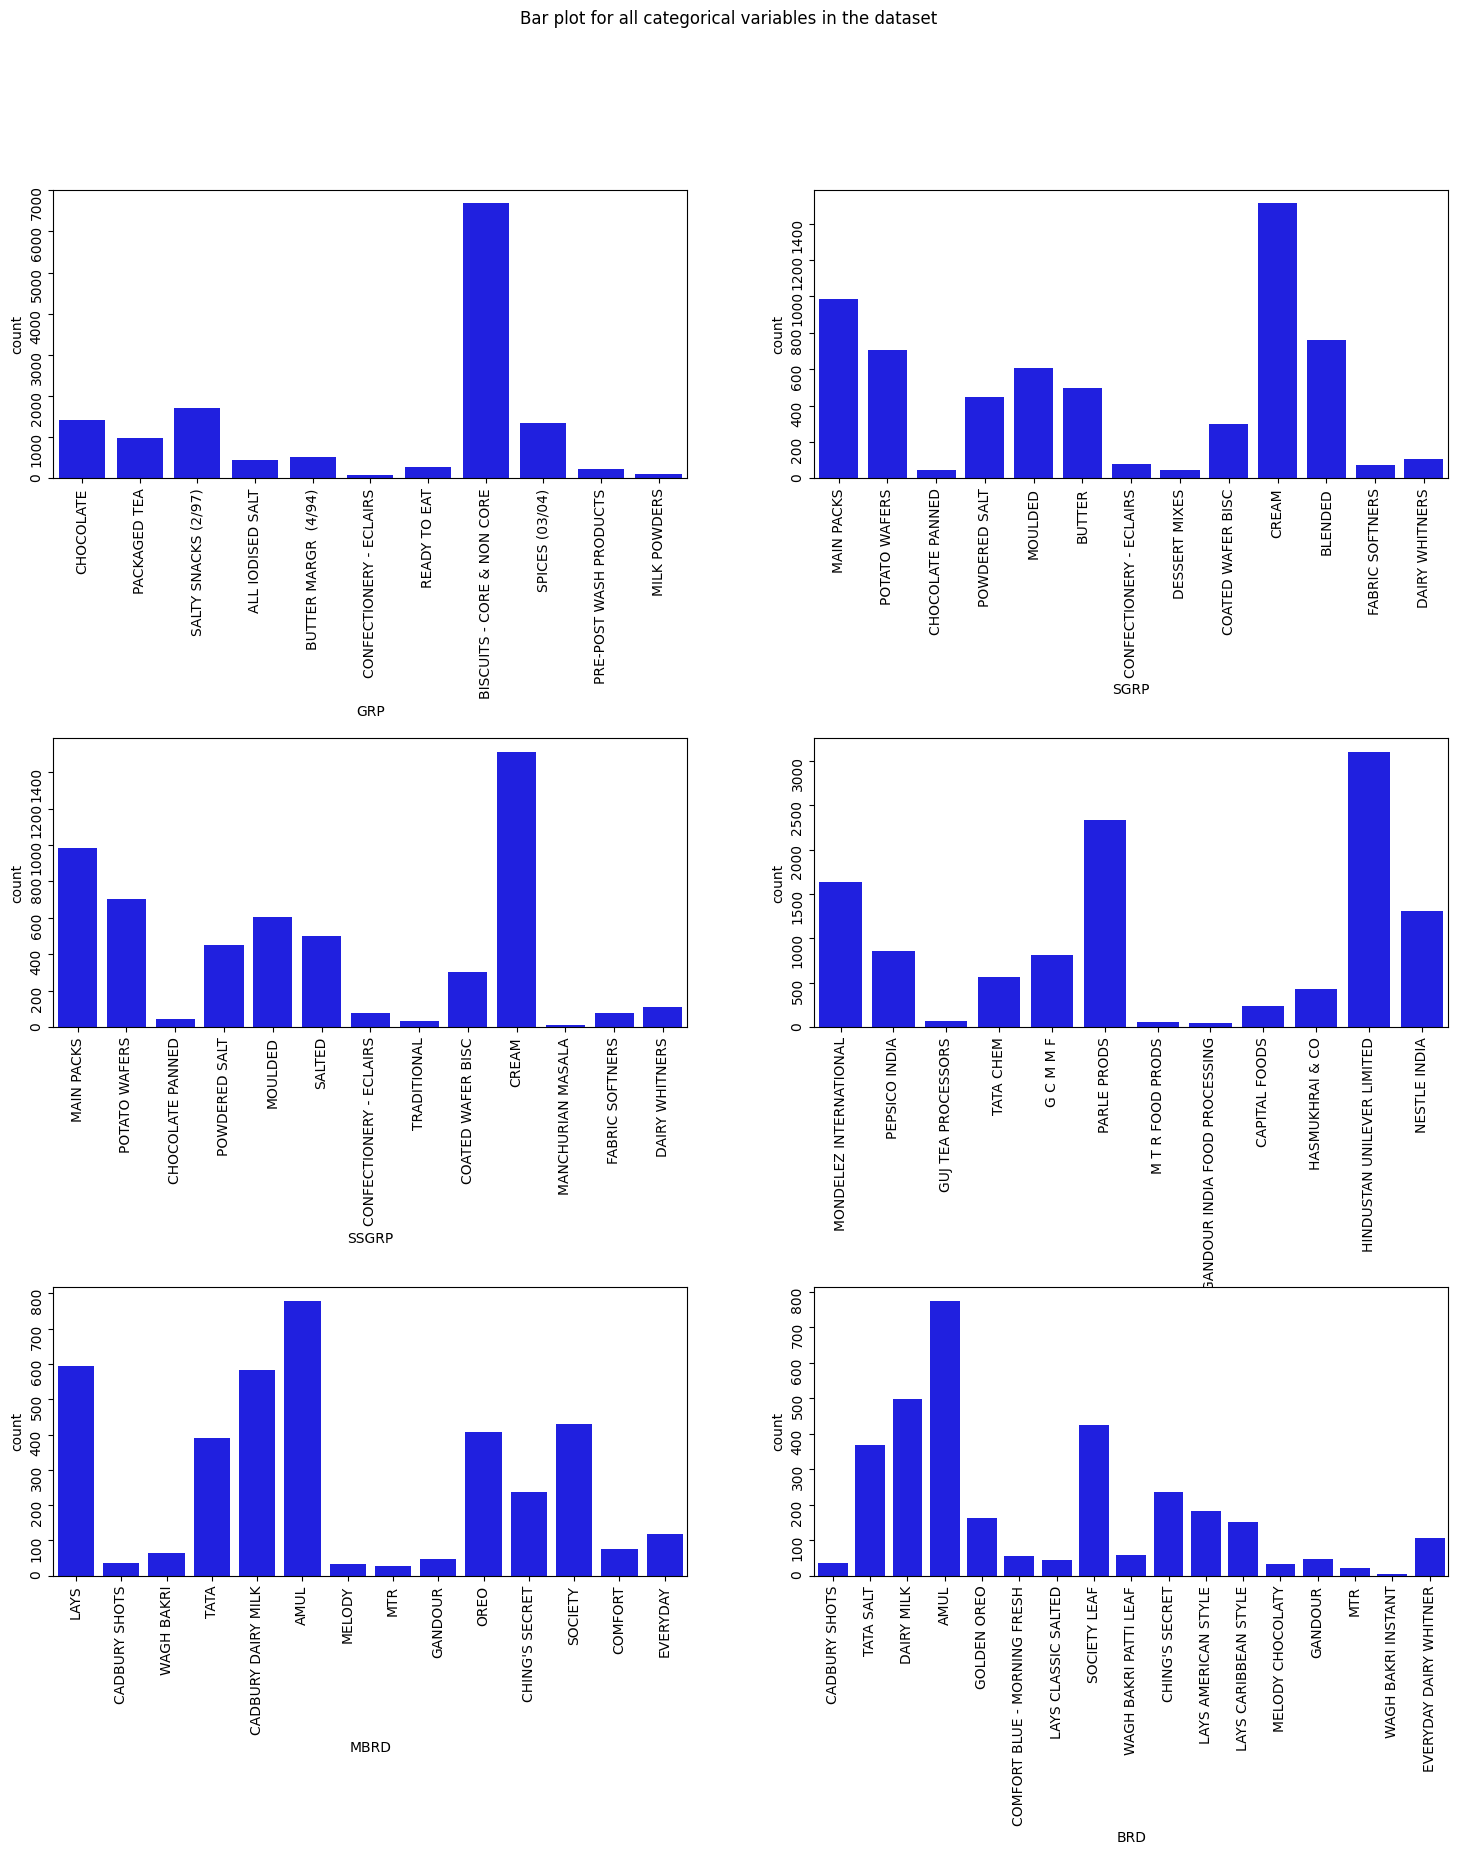

In [143]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18),gridspec_kw={'hspace': 0.9})
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'GRP', data = data, color = 'blue',
              order = data['GRP'].head(20).value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'SGRP', data = data, color = 'blue',
              order = data['SGRP'].head(20).value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'SSGRP', data = data, color = 'blue',
              order = data['SSGRP'].head(20).value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'CMP', data = data, color = 'blue',
              order = data['CMP'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'MBRD', data = data, color = 'blue',
              order = data['MBRD'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'BRD', data = data, color = 'blue',
              order = data['BRD'].head(20).value_counts().index);
for ax in axes.flatten():
    ax.tick_params(labelrotation=90)
plt.show()


# Correlation Analysis

**Correlation between Numerical features**

In [144]:
numerical_features = dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              MONTH  STORECODE       DAY  BILL_AMT       QTY     VALUE  \
MONTH      1.000000   0.023602  0.017576 -0.024441  0.012408 -0.006075   
STORECODE  0.023602   1.000000  0.005647  0.156223 -0.022373  0.109938   
DAY        0.017576   0.005647  1.000000 -0.048778  0.008452 -0.027689   
BILL_AMT  -0.024441   0.156223 -0.048778  1.000000  0.027493  0.460607   
QTY        0.012408  -0.022373  0.008452  0.027493  1.000000  0.067266   
VALUE     -0.006075   0.109938 -0.027689  0.460607  0.067266  1.000000   
PRICE      0.004855   0.110107 -0.021784  0.350183 -0.018358  0.791630   

              PRICE  
MONTH      0.004855  
STORECODE  0.110107  
DAY       -0.021784  
BILL_AMT   0.350183  
QTY       -0.018358  
VALUE      0.791630  
PRICE      1.000000  


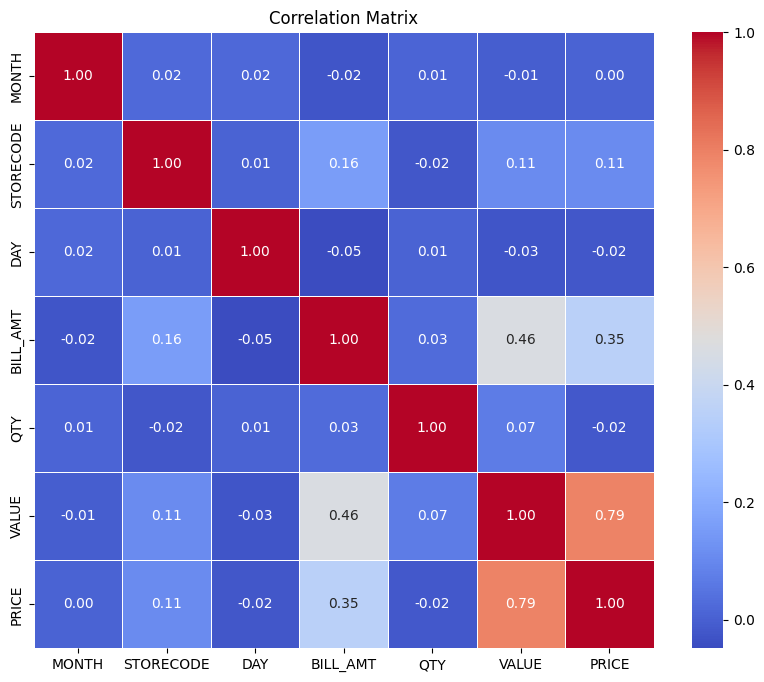

In [145]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Correlation between Categorical features**

In [146]:
from scipy.stats import chi2_contingency
categorical_features = dataset.select_dtypes(include=['object'])
chi2_results = {}
for column1 in categorical_features:
    for column2 in categorical_features:
        if column1 != column2:
            contingency_table = pd.crosstab(dataset[column1], dataset[column2])
            chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
            chi2_results[(column1, column2)] = {'chi2_stat': chi2_stat, 'p_value': p_value}
for key, value in chi2_results.items():
   print(f"Chi-square test between {key}:")
   print(f"Chi-square statistic: {value['chi2_stat']}")
   print(f"P-value: {value['p_value']}")
   print()


Chi-square test between ('BILL_ID', 'GRP'):
Chi-square statistic: 537004.6647903138
P-value: 6.1860742392740824e-183

Chi-square test between ('BILL_ID', 'SGRP'):
Chi-square statistic: 1152621.1774729462
P-value: 2.5263408880724168e-166

Chi-square test between ('BILL_ID', 'SSGRP'):
Chi-square statistic: 1600964.0178185578
P-value: 0.0

Chi-square test between ('BILL_ID', 'CMP'):
Chi-square statistic: 2334266.5836628373
P-value: 4.0818880650867654e-213

Chi-square test between ('BILL_ID', 'MBRD'):
Chi-square statistic: 4123961.703418914
P-value: 0.4451131217442009

Chi-square test between ('BILL_ID', 'BRD'):
Chi-square statistic: 8148225.9570802245
P-value: 1.0

Chi-square test between ('BILL_ID', 'UNIQUE_BILL_ID'):
Chi-square statistic: 172746585.00000057
P-value: 0.0

Chi-square test between ('GRP', 'BILL_ID'):
Chi-square statistic: 537004.6647903138
P-value: 6.1860742392740824e-183

Chi-square test between ('GRP', 'SGRP'):
Chi-square statistic: 2023596.0122640324
P-value: 0.0

Chi-s